In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

Какой клиент совершил больше всего успешных операций? (success == True)

С какой платформы осуществляется наибольшее количество успешных операций?

Какую платформу предпочитают премиумные клиенты?

Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

Постройте график распределения числа успешных операций

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix

In [52]:
#Загрузим оба датафрейма и склеим их по id (client)
user_data = pd.read_csv('user_data.csv')
logs = pd.read_csv('logs.csv')

user_data.head(5)

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [53]:
logs.head(5)

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [54]:
#размер 1 датафрейма
user_data.shape

(2954, 3)

In [55]:
#размер 2 датафрейма
logs.shape

(4500, 4)

In [56]:
df = user_data.merge(logs, on='client', how='inner')

In [57]:
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [58]:
print(f'Кол-во строк датафрейма: {df.shape[0]}\nКол-во столбцов датафрейма: {df.shape[1]} ')

Кол-во строк датафрейма: 3439
Кол-во столбцов датафрейма: 6 


In [59]:
columns = list(df.columns)
columns

['client', 'premium', 'age', 'success', 'platform', 'time']

In [60]:
print(f'Посмотрим на типы данных наших колонок:\n{df.dtypes}')

Посмотрим на типы данных наших колонок:
client       int64
premium       bool
age          int64
success       bool
platform    object
time         int64
dtype: object


In [61]:
#Пропущенных значений нет
df.isna().sum()

client      0
premium     0
age         0
success     0
platform    0
time        0
dtype: int64

In [62]:
df

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [63]:
#id - шники тоже удобнее хранить как объекты типа object
df['client'] = df['client'].astype('object')

In [64]:
#переведем время в нормальный формат
df['time'] = pd.to_datetime(df['time'],unit='s')

In [65]:
#Описание числовых колонок:
df.describe()
#std показывает на сколько наши данные разнообразны

,age
count,3439.000000
mean,44.222448
std,14.692909
min,20.000000
25%,31.000000
50%,44.000000
75%,57.000000
max,69.000000


Небольшие наблюдения:

- age(возраст):
1) Пропущенных значений в этой колонке нет.
2) Средний возраст клиентов составляет приблизительно 44 года.
3) Минимальный возраст пользователя - 20 лет.
4) Максимальный возраст пользователя - 69 лет.

- time(время):

Есть предположение, что время представлено в миллисекундах и по хорошему, перевести бы в нормальный формат (когда - нибудь у меня обязательно на это,и  тогда я напишу эту функцию, ауф) - > сделала ячейкой выше. 

In [66]:
#Описание нечисловых колонок:
df.describe(include=['object','category'])

,client,platform
count,3439,3439
unique,2954,3
top,61468,phone
freq,42,2117


In [67]:
platform_uniques = list(df.platform.unique())
platform_uniques

['phone', 'computer', 'tablet']

In [68]:
df.platform.value_counts()

phone       2117
computer    1140
tablet       182
Name: platform, dtype: int64

Небольшие наблюдения:

- client(id):

Количество уникальных пользователей составляет 2954, при этом самый активный (часто встречающийся) client имеет id 61468. Он частота появления этого пользователя - 42 раза.

- premium(клиент яв-ся премиум):

Колонка имеет 2 уникальных значения: False(0) - не премиум, True(1) - премиум. В данных чаще всего встречается пользователь без премиум - подписки. 

- success(успех):

Колонка имеет 2 уникальных значения: True(1) - успех, False(0) - неудача. Самое популярное значени - это успех(1).

- platform(платформа):

Всего 3 уникальных значения:'phone' - телефон, 'computer'- компьютер, 'tablet' - планшет. В данных чаще всего пользователи используют phone ( в данных phone встречается 2117 раза)

In [69]:
df.describe(include=['datetime64'], datetime_is_numeric=True)

,time
count,3439
mean,2020-03-29 00:02:31.542890496
min,2020-03-28 12:53:22
25%,2020-03-28 18:21:43.500000
50%,2020-03-29 00:01:57
75%,2020-03-29 05:40:53
max,2020-03-29 11:06:20


Смею предположить, что данные собраны за период длинной ~ 24 часа, так как минимальное время в системе составляет 2020-03-28 12:53:22, а максимальное равно 2020-03-29 11:06:20.

In [70]:
#ещё раз посмотрим на количество уникальных значений для всех даных 
df.nunique()
#Количество уникальных значений для возраста составляет 50

client      2954
premium        2
age           50
success        2
platform       3
time        3365
dtype: int64

Найдем клиента (или клиентов), который совершил больше всего успешных операций.

In [89]:
top_client_success_operations = df \
                            .query('success == 1') \
                            .groupby('client', as_index=False) \
                            .agg({'platform':'count'}) \
                            .rename(columns={'platform':'count_success'}) \
                            .sort_values('count_success', ascending=False) 
top_client_success_operations

,client,count_success
250,12179,41
737,36165,41
588,28719,41
1280,61473,41
1279,61468,41
...,...,...
702,34642,1
701,34640,1
700,34630,1
699,34615,1


In [80]:
max_success = top_client_success_operations.count_success.max()
max_success

41

In [81]:
top_clients = top_client_success_operations[top_client_success_operations.count_success == max_success].sort_values('client')
top_clients

,client,count_success
250,12179,41
588,28719,41
737,36165,41
1084,52870,41
1279,61468,41
1280,61473,41
1636,78349,41
1716,82563,41
1933,92584,41


In [83]:
#чтобы сослаться на переменную, которой нету в query необходмо поставить @ перед переменной
top_client_success_operations.query('count_success == @max_success')

,client,count_success
250,12179,41
737,36165,41
588,28719,41
1280,61473,41
1279,61468,41
1933,92584,41
1716,82563,41
1084,52870,41
1636,78349,41


In [82]:
top_clients_list = list(top_clients.client)
top_clients_list


[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [87]:
#можно сделать иначе ( короче с методом tolist)

top_client_success_list = top_client_success_operations.query('count_success == @max_success') \
                             .sort_values('client') \
                             .client \
                             .tolist()
#получим строку
str_top_client_success_operations = ', '.join([str(i) for i in top_client_success_list])
str_top_client_success_operations

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

Таким образом, максимальное количество операций, которые совершал один пользователь ровняется 41.

Список id этих пользователей: [12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [88]:
#другое решение 
top_client_success_operations2 = df \
                            .groupby('client', as_index=False) \
                            .agg({'success':'sum'}) \
                            .rename(columns={'success':'count_success'}) \
                            .sort_values('count_success', ascending=False) 
top_client_success_operations2

,client,count_success
2416,82563,41
1791,61468,41
1792,61473,41
1521,52870,41
2723,92584,41
...,...,...
2243,76661,0
2244,76712,0
2245,76732,0
517,18054,0


In [90]:
max_success2 = top_client_success_operations.count_success.max()
print(max_success2)


41


In [91]:
top_client_success_list2 = top_client_success_operations2.query('count_success == @max_success2') \
                             .sort_values('client') \
                             .client \
                             .tolist()
#получим строку
str_top_client_success_operations2 = ', '.join([str(i) for i in top_client_success_list2])
str_top_client_success_operations2

'12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584'

С какой платформы осуществляется наибольшее количество успешных операций?

In [93]:
top_platform_success_operations = df \
.query('success == 1') \
.groupby('platform', as_index=False) \
.agg({'success':'count'}) \
.rename(columns={'success':'count_success'}) \
.sort_values('count_success', ascending=False) 


In [94]:
top_platform_success_operations

,platform,count_success
1,phone,1565
0,computer,843
2,tablet,139


In [96]:
#другое решение 
df.query('success == True').platform.value_counts()

phone       1565
computer     843
tablet       139
Name: platform, dtype: int64

Наибольшее количество успешных операций происходило с телефона ( в количестве 1565 ). С компьютера выявлено 843 успешные операции, а с планшета 139.

In [28]:
top_platform_for_premium_clients = df \
.query('premium == 1') \
.groupby('platform', as_index=False) \
.agg({'premium':'count'}) \
.sort_values('premium', ascending=False) \
.rename(columns={'premium':'count_premium_clients'})

In [29]:
top_platform_for_premium_clients

,platform,count_premium_clients
1,phone,246
0,computer,150
2,tablet,24


In [97]:
#другое решение 
df.query('premium == True').platform.value_counts()

phone       246
computer    150
tablet       24
Name: platform, dtype: int64

Можно сделать вывод, что премиумные клиенты отдают преподчтение платформе - телефону, а не компьютеру или планшету.

In [30]:
top_platform_for_premium_clients

,platform,count_premium_clients
1,phone,246
0,computer,150
2,tablet,24


Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

In [37]:
df \
.groupby(['age','premium'], as_index=[False, True]) \
.agg({'premium':'count'})


premium
age premium         
20  0             46
    1              9
21  0             50
    1              8
22  0             51
...              ...
67  1             11
68  0             98
    1              9
69  0             83
    1              7

[100 rows x 1 columns]

<AxesSubplot: xlabel='age', ylabel='Count'>

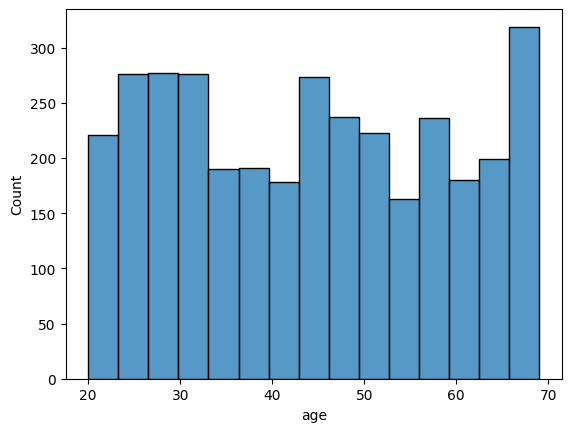

In [98]:
#принимает одну колонку df по которой будет рисовать распределение
#распределение возраста
sns.histplot(df.age)

<AxesSubplot: xlabel='age', ylabel='Count'>

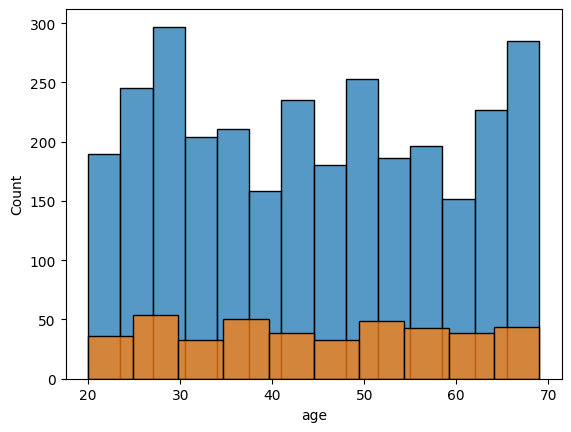

In [100]:
sns.histplot(df.query('premium == False').age)
sns.histplot(df.query('premium == True').age)

<AxesSubplot: xlabel='age', ylabel='Probability'>

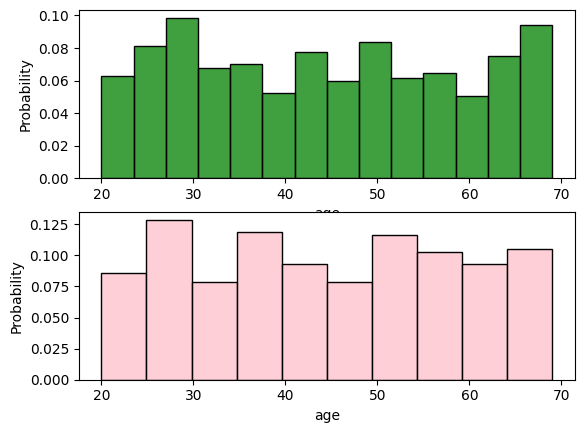

In [122]:
#несколько графиков в сетке
#распределение возраста клиентов в зависимости от типа клиента 
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.histplot(df.query('premium == False').age, ax=ax[0], color='green', stat = 'probability')
sns.histplot(df.query('premium == True').age, ax=ax[1], color='pink', stat = 'probability')



Постройте график распределения числа успешных операций

In [114]:
success_number = df.groupby('client') \
  .agg({'success':'sum'})

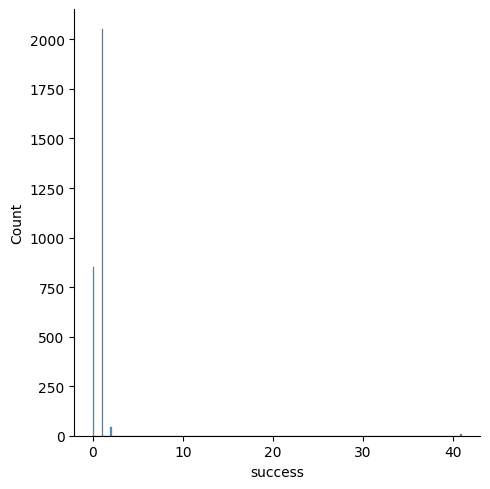

In [123]:
sns.displot(success_number.success)

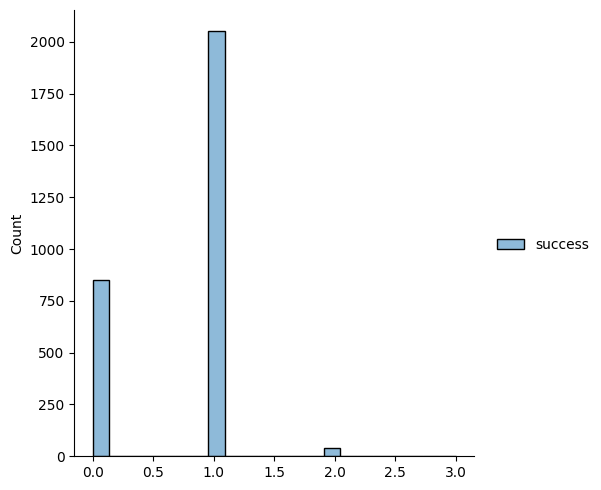

In [132]:
sns.displot(success_number[success_number.success < 10])

Чаще всего клиенты делали по 1 запросу.

In [125]:
success_number.success.value_counts()

1     2051
0      850
2       42
41       9
40       1
3        1
Name: success, dtype: int64

Видим некоторый пик в правой части - 9 клиентов с 41 успешным заказом.

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций). Клиенты какого возраста совершили наибольшее количество успешных действий?

In [127]:
succses_age = df \
.query('platform == "computer" and success == 1') \
.groupby('age', as_index=False) \
.agg({'success':'count'}) \
.rename(columns={'success':'count_succses'}) \
.sort_values('count_succses', ascending=False) \
.reset_index(drop=True)
succses_age.head(7)

,age,count_succses
0,28,49
1,49,33
2,25,33
3,32,27
4,68,26
5,24,26
6,69,24


<AxesSubplot: xlabel='age', ylabel='count_succses'>

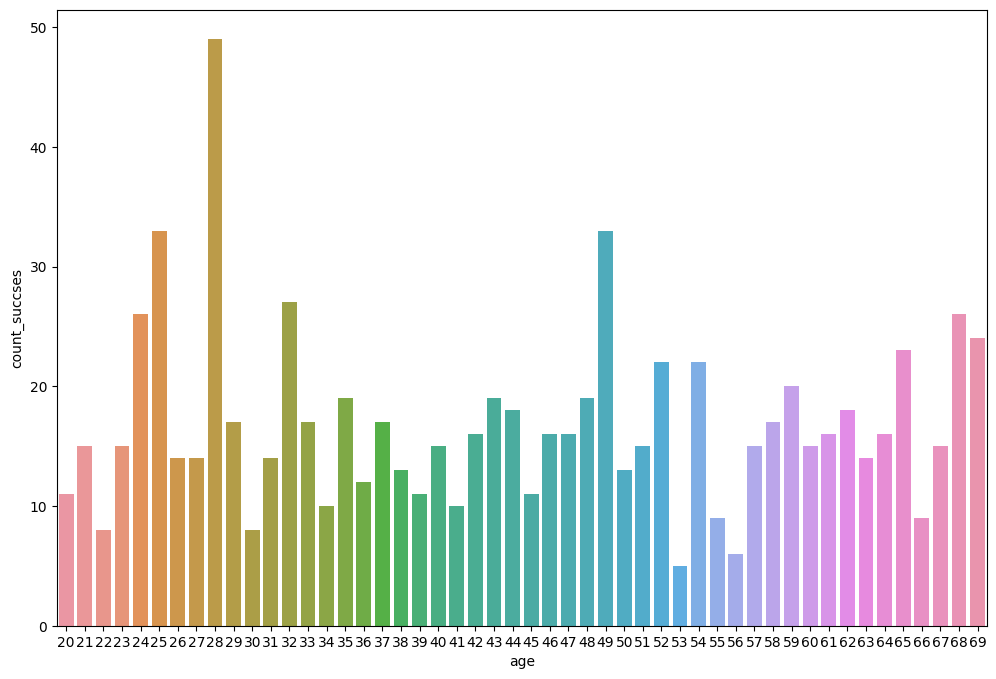

In [128]:
plt.figure(figsize=(12,8))

sns.barplot(x=succses_age.age, y = succses_age.count_succses)

In [129]:
succses = df.query('platform == "computer" and success == 1')

In [130]:
succses

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,2020-03-28 13:54:58
12,32406,False,24,True,computer,2020-03-29 10:56:22
14,62404,False,40,True,computer,2020-03-28 21:14:57
20,68848,False,35,True,computer,2020-03-29 00:09:13
26,49675,False,48,True,computer,2020-03-28 13:28:28
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,2020-03-29 07:19:09
3415,13688,True,66,True,computer,2020-03-29 03:52:03
3417,68348,False,69,True,computer,2020-03-29 04:38:59
3427,9450,False,34,True,computer,2020-03-29 01:41:19


<AxesSubplot: xlabel='age', ylabel='count'>

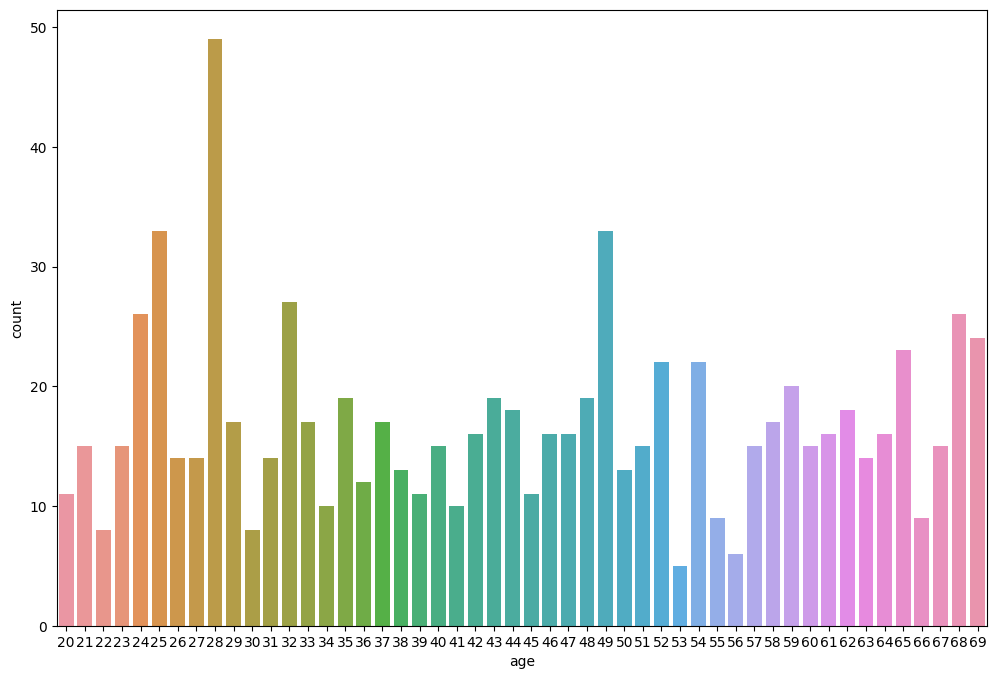

In [131]:
plt.figure(figsize=(12,8))
sns.countplot(succses, x='age')


 Таким образом, клиенты в возрасте  28 лет сделали наибольшее число успешных действий.